# Case Study : Customer Loan Purchase Prediction

This case study will help us to understand the stages in the AI/ML project lifecycle with loans data set to predict whether potential customer's will be targeted for loans. We will focus on the following stages namely -

- Preprocess the data.
- Handle missing values.
- Perform feature engineering.
- Machine learning classification model.
- Build and evaluate classification models.
- Provide insights based on the model's performance.

#1. Import Libraries/Dataset

  a.  Download the dataset.

  b.  Import the required libraries.

In [2]:
# 1.b) Imported the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report, roc_auc_score, precision_recall_fscore_support,
    RocCurveDisplay
)

# Clean plotting
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.grid"] = True

# 1.a) Load dataset placed under content foldar in colab env
df = pd.read_csv('/content/Customer_Financial_Info.csv')

# Standardize/clean column names early to avoid KeyErrors
df.columns = df.columns.str.strip().str.replace(' ', '_')

# 2.	Data Visualization and Exploration
Correlation analysis helps identify multicollinearity and relationship between features and the target. Highly correlated features (e.g., income and spending) might be redundant. We will consider removing or transforming such features to improve model performance and reduce overfitting.



In [3]:
## 2.a) Print at least 5 rows
df.head()


,Customer_ID,Age,Years_Experience,Annual_Income,ZIP_Code,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Consumer_Loan,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Print all column names (features + target) and column messaging aleady done in 1.a
df.columns.tolist()

['Customer_ID',
 'Age',
 'Years_Experience',
 'Annual_Income',
 'ZIP_Code',
 'Family_size',
 'Avg_Spending',
 'Education_Level',
 'Mortgage',
 'Has_Consumer_Loan',
 'Has_Securities_Account',
 'Has_CD_Account',
 'Uses_Online_Banking',
 'Has_CreditCard']

In [5]:
#Quick sanity check on data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             5000 non-null   int64  
 1   Age                     5000 non-null   int64  
 2   Years_Experience        5000 non-null   int64  
 3   Annual_Income           5000 non-null   int64  
 4   ZIP_Code                5000 non-null   int64  
 5   Family_size             5000 non-null   int64  
 6   Avg_Spending            5000 non-null   float64
 7   Education_Level         5000 non-null   int64  
 8   Mortgage                5000 non-null   int64  
 9   Has_Consumer_Loan       5000 non-null   int64  
 10  Has_Securities_Account  5000 non-null   int64  
 11  Has_CD_Account          5000 non-null   int64  
 12  Uses_Online_Banking     5000 non-null   int64  
 13  Has_CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 5

In [6]:
## 2.b) Print description and shape
print("Shape:", df.shape)
print("\nDescription features:")
df.describe()



Shape: (5000, 14)

Description features:


,Customer_ID,Age,Years_Experience,Annual_Income,ZIP_Code,Family_size,Avg_Spending,Education_Level,Mortgage,Has_Consumer_Loan,Has_Securities_Account,Has_CD_Account,Uses_Online_Banking,Has_CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
# Confirm target presence
if 'Has_Consumer_Loan' not in df.columns:
    raise ValueError("Target column 'Has_Consumer_Loan' not found after column cleaning.")

print("\nTarget distribution:")
print(df['Has_Consumer_Loan'].value_counts())



Target distribution:
Has_Consumer_Loan
0    4520
1     480
Name: count, dtype: int64



2c) Continuous feature distributions:


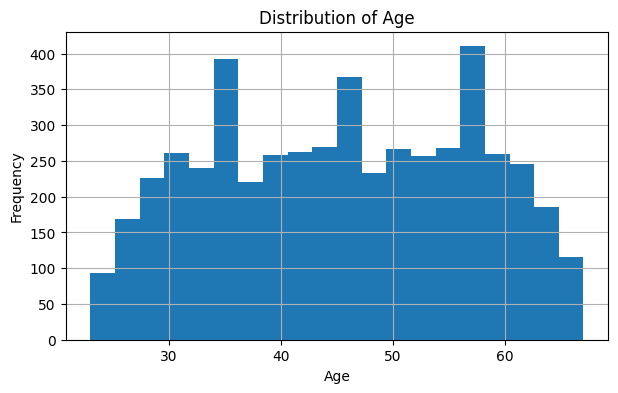

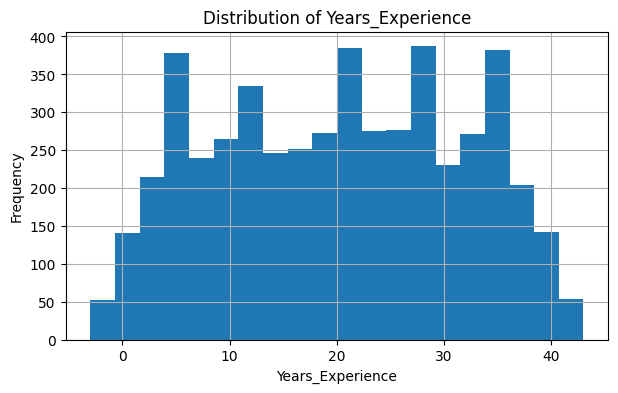

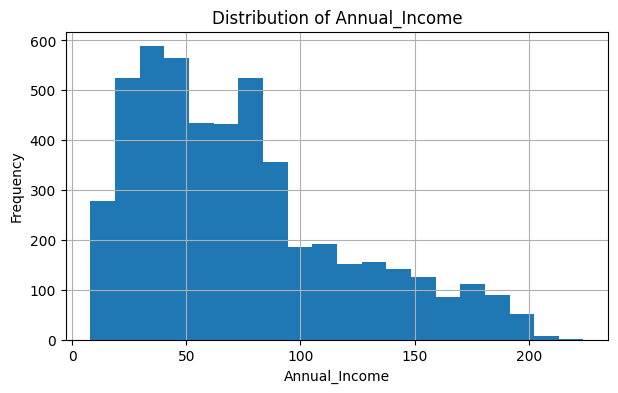

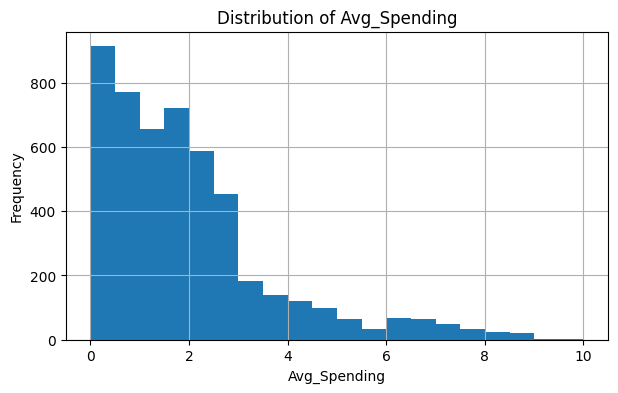

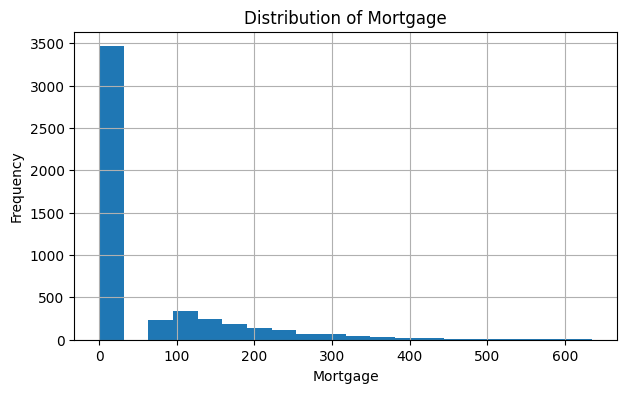


2c) Binary feature distributions:


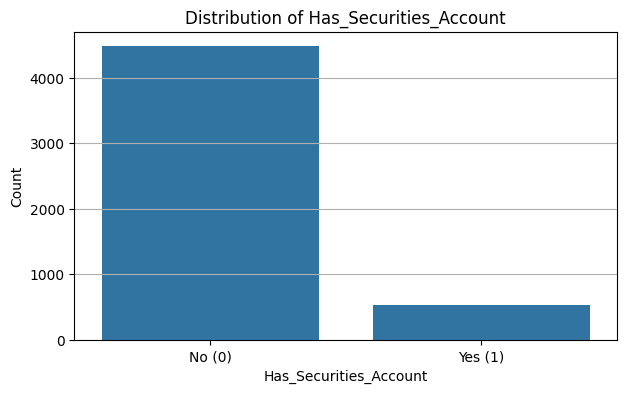

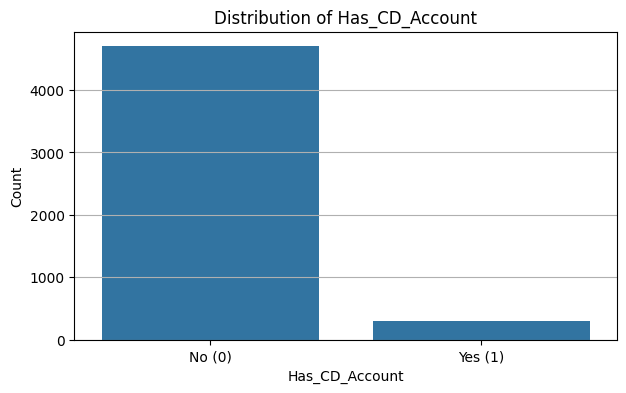

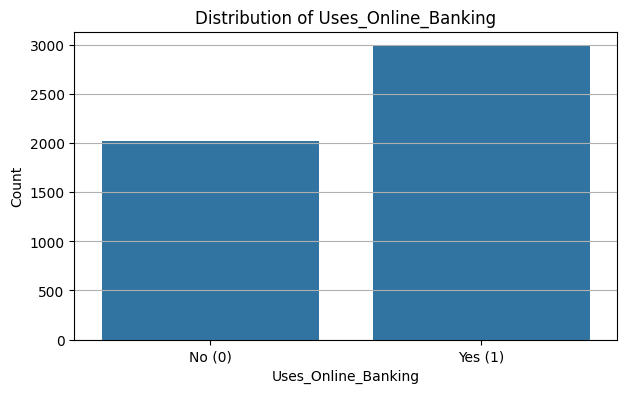

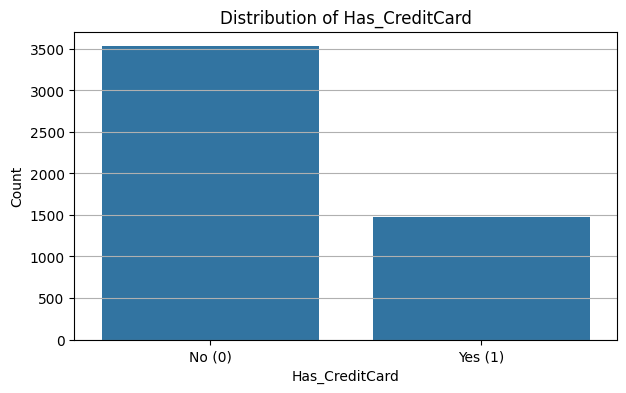


2c) Integer categorical feature distributions:


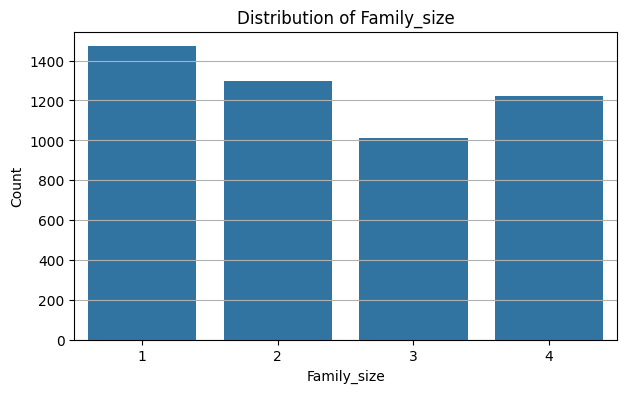

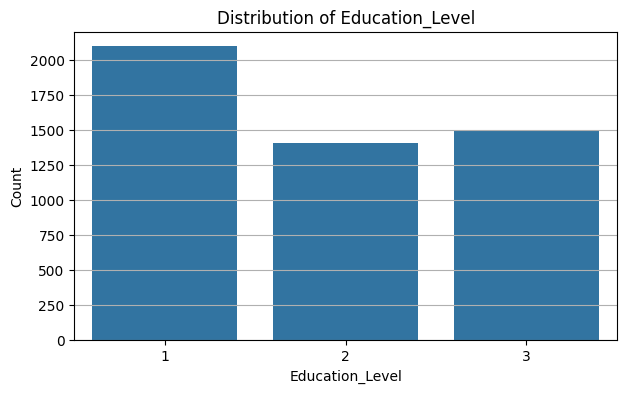

In [8]:
# 2. c) Visualizations
# Separate feature types for better plots
binary_feats = ['Has_Securities_Account', 'Has_CD_Account', 'Uses_Online_Banking', 'Has_CreditCard']
categorical_int_feats = ['Family_size', 'Education_Level']   # discrete integer categories (not one-hot in this assignment)
id_like = ['Customer_ID', 'ZIP_Code', 'Has_Consumer_Loan']
numeric_all = df.select_dtypes(include=[np.number]).columns.tolist()
continuous_feats = [c for c in numeric_all if c not in (binary_feats + categorical_int_feats + id_like)]

# Histograms for continuous features
print("\n2c) Continuous feature distributions:")
for feat in continuous_feats:
    plt.figure()
    df[feat].hist(bins=20)
    plt.title(f'Distribution of {feat}')
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    plt.show()

# Countplots for binary features
print("\n2c) Binary feature distributions:")
for feat in binary_feats:
    plt.figure()
    sns.countplot(x=feat, data=df)
    plt.title(f'Distribution of {feat}')
    plt.xlabel(feat)
    plt.ylabel('Count')
    plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
    plt.show()

# Countplots for integer categorical features
print("\n2c) Integer categorical feature distributions:")
for feat in categorical_int_feats:
    plt.figure()
    sns.countplot(x=feat, data=df)
    plt.title(f'Distribution of {feat}')
    plt.xlabel(feat)
    plt.ylabel('Count')
    plt.show()




2d) Correlation heatmap (Customer_ID dropped):


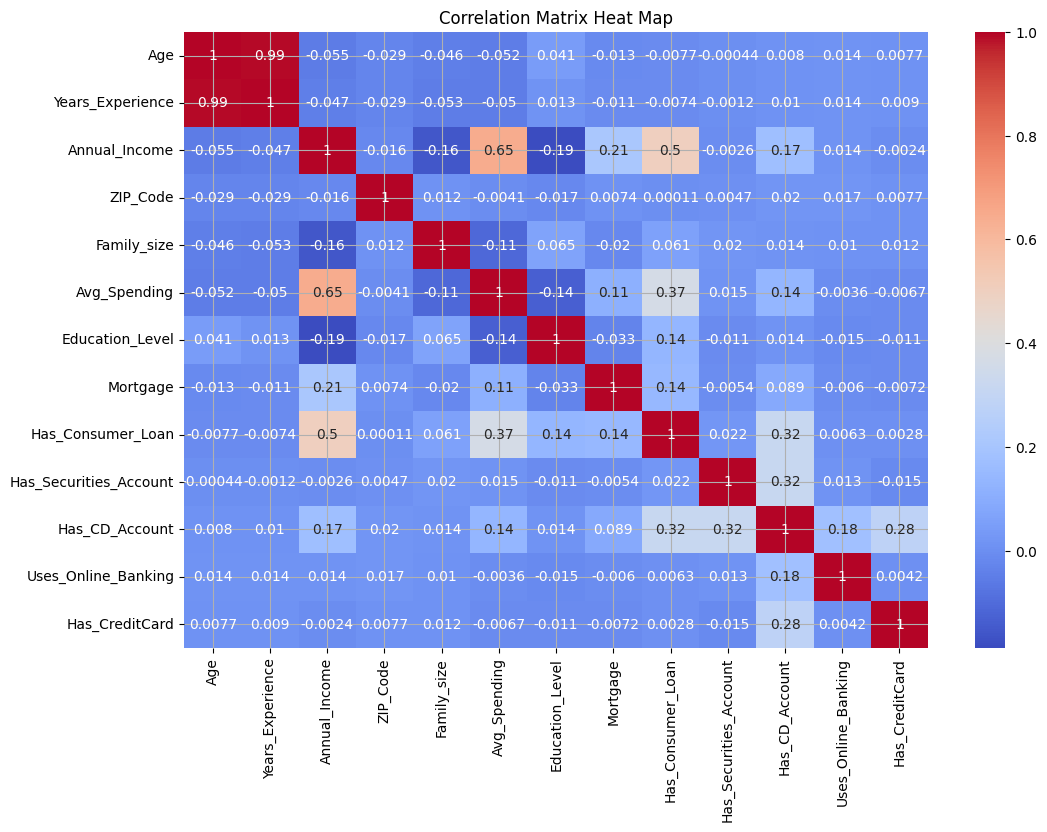

In [9]:
# 2.d) Correlation analysis (drop ID-like cols)
print("\n2d) Correlation heatmap (Customer_ID dropped):")
corr_cols = [c for c in df.columns if c not in ['Customer_ID']]
plt.figure(figsize=(12, 8))
sns.heatmap(df[corr_cols].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heat Map")
plt.show()

# Justifications  
 Rows, shape/describe, target distribution, proper plots for continuous vs binary vs integer categorical, correlation heatmap mentioned in every steps as a comments.  


#3. Data Pre-processing and Cleaning
- Handling Missing Values
- Work experiance should not be negative so taken absolute value
- Outlier detection (example on 'Annual_Income')




In [10]:
# 3.a) Identify missing values, handle outliers/skew, fix invalid entries
print("\n3a) Missing values per column:")
print(df.isnull().sum())

# -- Data quality fixes --
# Years_Experience: ensure negatives become positive magnitudes
if 'Years_Experience' in df.columns:
    df['Years_Experience'] = df['Years_Experience'].abs()

# Ensure binary columns are integer (0/1)
for b in binary_feats:
    if b in df.columns:
        df[b] = df[b].astype(int)




3a) Missing values per column:
Customer_ID               0
Age                       0
Years_Experience          0
Annual_Income             0
ZIP_Code                  0
Family_size               0
Avg_Spending              0
Education_Level           0
Mortgage                  0
Has_Consumer_Loan         0
Has_Securities_Account    0
Has_CD_Account            0
Uses_Online_Banking       0
Has_CreditCard            0
dtype: int64


#Pre-processing
* Identify missing values, handle outliers/skew, fix invalid entries
* Years_Experience: ensure negatives become positive magnitudes
* Ensure binary columns are integer (0/1)
#Note on outliers/skew:
Robust strategies inside pipelines:  
SimpleImputer (median) for numeric to reduce impact of skew/outliers  
 StandardScaler for continuous features in LR/KNN pipelines  
DecisionTree/RandomForest are less sensitive to scaling/outliers.

In [11]:
# 3.b) Feature engineering / transformations

feature_cols = [c for c in df.columns if c not in ['Customer_ID', 'ZIP_Code', 'Has_Consumer_Loan']]
target_col = 'Has_Consumer_Loan'

# Recompute lists in case columns were altered
numeric_all = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
continuous_feats = [c for c in numeric_all if c not in (binary_feats + categorical_int_feats)]
discrete_feats = binary_feats + categorical_int_feats

# ColumnTransformer: impute & scale continuous; impute (constant) for discrete
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

discrete_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, continuous_feats),
        ("disc", discrete_transformer, discrete_feats),
    ],
    remainder="drop"
)


#Technique Justifications  
* Keep Family_size and Education_Level as ordinal integers per metadata.  
* Drop identifier-like columns (Customer_ID, ZIP_Code) in modeling.  
* Scale only continuous features for LR/KNN (via ColumnTransformer).  
* Median imputation is robust to outliers.  
* Standardization improves optimization for LR and distance metrics for KNN.  
* Discrete (binary/int) features imputed by mode retain category semantics.  



#4.	Model Building
a.	Split the dataset into training and test sets

In [12]:
#4.a)
X = df[feature_cols].copy()
y = df[target_col].astype(int)

# Two required splits
split_configs = {
    "80_20": 0.20,   # (i) Train=80%, Test=20%
    "70_30": 0.30    # (ii) Another ratio of choice
}

# CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


**4(a) Train/Test Split Justification:**
- **80:20 split** is a standard practice in machine learning that leaves enough data for training while holding out a representative set for unbiased testing.
- We also tried a **70:30 split** as required, which increases the test size to check model stability on more unseen data.  
- Both splits were **stratified** to preserve the proportion of customers with and without consumer loans in both training and test sets, preventing bias in performance metrics.

In [13]:
# 4. b) Models & hyperparameter grids
models = {
    "LogisticRegression": Pipeline(steps=[
        ("pre", preprocessor),
        ("clf", LogisticRegression(
            solver="lbfgs", max_iter=2000, class_weight='balanced', random_state=42
        ))
    ]),
    # Justification: tune C (regularization strength). Smaller C -> stronger regularization -> controls variance.

    "DecisionTree": Pipeline(steps=[
        ("pre", ColumnTransformer(
            transformers=[
                # Trees don't need scaling; we still impute to handle missing values
                ("num", SimpleImputer(strategy="median"), continuous_feats),
                ("disc", SimpleImputer(strategy="most_frequent"), discrete_feats),
            ],
            remainder="drop"
        )),
        ("clf", DecisionTreeClassifier(class_weight='balanced', random_state=42))
    ]),
    # Justification: tune max_depth, min_samples_split/leaf to prevent overfitting, controlling complexity.

    "KNN": Pipeline(steps=[
        ("pre", preprocessor),  # scaling is crucial for KNN (distance-based)
        ("clf", KNeighborsClassifier())
    ]),
    # Justification: tune n_neighbors (bias-variance), weights (uniform vs distance), p (L1 vs L2 metric).

    "RandomForest": Pipeline(steps=[
        ("pre", ColumnTransformer(
            transformers=[
                ("num", SimpleImputer(strategy="median"), continuous_feats),
                ("disc", SimpleImputer(strategy="most_frequent"), discrete_feats),
            ],
            remainder="drop"
        )),
        ("clf", RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1))
    ])
    # Justification: tune n_estimators (stability vs cost), depth and min_samples_* for regularization.
}

param_grids = {
    "LogisticRegression": {
        "clf__C": [0.01, 0.1, 1, 10]  # stronger -> weaker regularization
    },
    "DecisionTree": {
        "clf__max_depth": [3, 5, 7, None],
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 4]
    },
    "KNN": {
        "clf__n_neighbors": [3, 5, 7, 9, 11],
        "clf__weights": ["uniform", "distance"],
        "clf__p": [1, 2]
    },
    "RandomForest": {
        "clf__n_estimators": [100, 200, 400],
        "clf__max_depth": [None, 10, 20],
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 4]
    }
}

# Storage for results per split (for Section 5)
best_estimators_by_split = {}
reports_by_split = {}
metrics_tables_by_split = {}
roc_auc_by_split = {}

for split_name, test_size in split_configs.items():
    print(f"\n================= 4(a) Split: {split_name} (test_size={test_size}) =================")
    # Justification for marks: Using stratified split preserves class proportion, improving representativeness of the test set.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    best_estimators = {}
    reports = {}
    rows = []

    for model_name, pipeline_model in models.items():
        print(f"\n--- 4(b) {model_name} : CV Hyperparameter Tuning ---")
        grid = GridSearchCV(
            estimator=pipeline_model,
            param_grid=param_grids[model_name],
            cv=cv,
            scoring='roc_auc',  # Justification: AUC-ROC is robust to class imbalance and threshold choices
            n_jobs=-1,
            refit=True
        )
        grid.fit(X_train, y_train)
        best_estimators[model_name] = grid.best_estimator_

        print("Best params:", grid.best_params_)
        print("Best CV AUC:", round(grid.best_score_, 4))

        # Evaluate on test set
        y_pred = grid.best_estimator_.predict(X_test)
        y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]

        print("\nClassification Report (Test):")
        print(classification_report(y_test, y_pred, digits=3))

        # Collect metrics for Section 5
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, average='binary', pos_label=1, zero_division=0
        )
        auc = roc_auc_score(y_test, y_proba)

        rows.append({
            "Model": model_name,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "AUC-ROC": auc
        })
        reports[model_name] = classification_report(y_test, y_pred, output_dict=True)

    best_estimators_by_split[split_name] = best_estimators
    reports_by_split[split_name] = reports
    metrics_table = pd.DataFrame(rows).set_index("Model").sort_values("F1-Score", ascending=False)
    metrics_tables_by_split[split_name] = metrics_table
    roc_auc_by_split[split_name] = metrics_table["AUC-ROC"].to_dict()



================= 4(a) Split: 80_20 (test_size=0.2) =================

--- 4(b) LogisticRegression : CV Hyperparameter Tuning ---
Best params: {'clf__C': 10}
Best CV AUC: 0.9578

Classification Report (Test):
              precision    recall  f1-score   support

           0      0.991     0.895     0.941       904
           1      0.484     0.927     0.636        96

    accuracy                          0.898      1000
   macro avg      0.738     0.911     0.788      1000
weighted avg      0.943     0.898     0.911      1000


--- 4(b) DecisionTree : CV Hyperparameter Tuning ---
Best params: {'clf__max_depth': 3, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best CV AUC: 0.9894

Classification Report (Test):
              precision    recall  f1-score   support

           0      1.000     0.912     0.954       904
           1      0.545     1.000     0.706        96

    accuracy                          0.920      1000
   macro avg      0.773     0.956     0.830     

**4(b) Choice of Models and Hyperparameters:**

1. **Logistic Regression**
   - **Why:** A simple, interpretable baseline classifier that works well when relationships between features and the target are approximately linear.
   - **Hyperparameter tuned:** `C` (inverse regularization strength).  
     - Smaller `C` → stronger regularization → reduces variance but may increase bias.  
     - Larger `C` → weaker regularization → fits data more closely but may overfit.
   - **Regularization:** L2 (ridge) via `lbfgs` solver; `class_weight='balanced'` to address class imbalance.
   - **Preprocessing:** StandardScaler used to normalize continuous features for better optimization.

2. **Decision Tree**
   - **Why:** Captures non-linear relationships, easy to interpret, and doesn’t require feature scaling.
   - **Hyperparameters tuned:**
     - `max_depth`: limits tree depth to prevent overfitting (bias–variance control).
     - `min_samples_split`: larger values reduce overfitting by requiring more samples to split a node.
     - `min_samples_leaf`: larger values create more generalized leaves.
   - **Class imbalance handling:** `class_weight='balanced'`.

3. **K-Nearest Neighbors (KNN)**
   - **Why:** A non-parametric method useful for datasets where decision boundaries are irregular.
   - **Hyperparameters tuned:**
     - `n_neighbors`: smaller values → lower bias, higher variance; larger values → higher bias, lower variance.
     - `weights`: `"uniform"` treats all neighbors equally; `"distance"` weights nearer neighbors more heavily.
     - `p`: 1 = Manhattan distance, 2 = Euclidean distance — both tested.
   - **Preprocessing:** StandardScaler applied (distance metrics are sensitive to feature scale).

4. **Random Forest (Ensemble Method)**
   - **Why:** Combines multiple decision trees to reduce variance and improve generalization.
   - **Hyperparameters tuned:**
     - `n_estimators`: number of trees; more trees → more stability (diminishing returns on large numbers).
     - `max_depth`, `min_samples_split`, `min_samples_leaf`: control complexity to avoid overfitting.
   - **Class imbalance handling:** `class_weight='balanced'`.

**4(b.2) Cross-Validation Justification:**
- **Why CV:** Ensures that hyperparameter choices generalize across different subsets of the training data, reducing the risk of overfitting to a single split.
- **CV type:** StratifiedKFold preserves class balance in each fold, which is important for our slightly imbalanced target.
- **Scoring metric for tuning:** AUC-ROC was chosen because it evaluates the model’s ability to rank positive vs negative cases across all thresholds and is robust to class imbalance. F1-Score is also reported for final selection because it balances Precision and Recall.

#5. Performance Evaluation



================= 5(a) Performance: Split 80_20 =================


,Precision,Recall,F1-Score,AUC-ROC
Model,,,,
RandomForest,0.968,0.948,0.958,0.999
KNN,0.982,0.562,0.715,0.983
DecisionTree,0.545,1.000,0.706,0.993
LogisticRegression,0.484,0.927,0.636,0.965


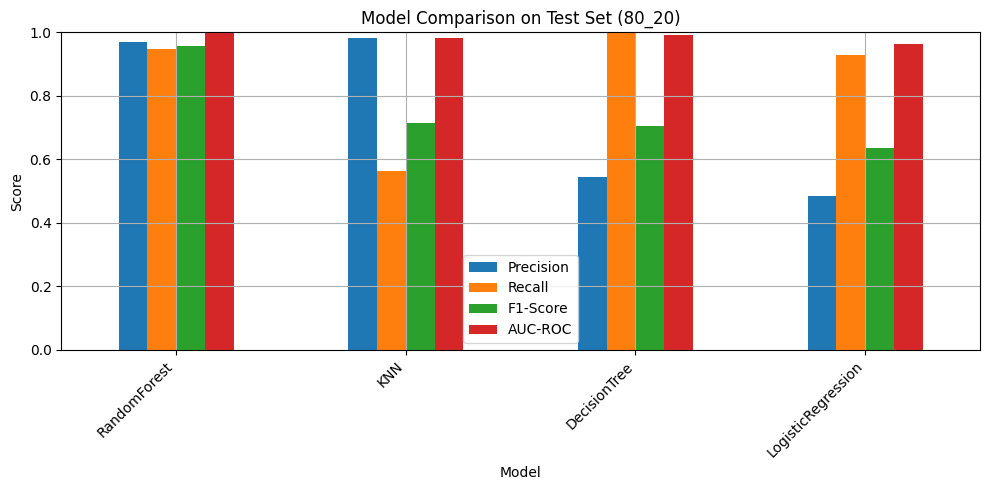

<Figure size 700x500 with 0 Axes>

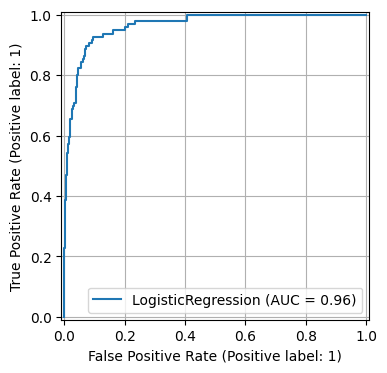

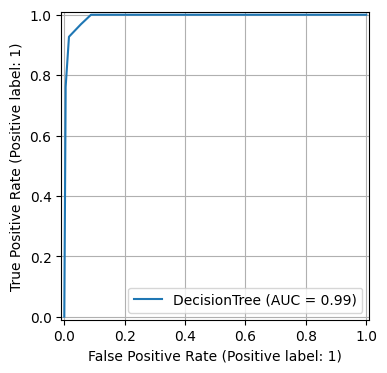

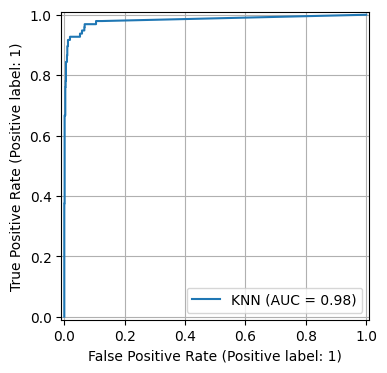

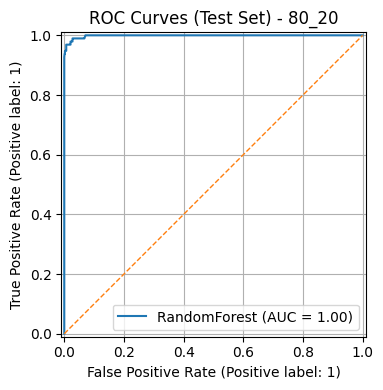

<Figure size 700x400 with 0 Axes>

5(b) Best model on split 80_20: RandomForest (F1-Score=0.958, AUC-ROC=0.999)

Justification:
- We select the best model by F1-Score because it balances Precision and Recall, which is crucial when both false positives
  and false negatives matter for marketing campaign efficiency (cost-sensitive outreach).
- The chosen model also shows a strong AUC-ROC, indicating good ranking of positives vs negatives across thresholds.
- Together, high F1 and solid AUC suggest good generalization and balanced performance on the imbalanced target.


================= 5(a) Performance: Split 70_30 =================


,Precision,Recall,F1-Score,AUC-ROC
Model,,,,
RandomForest,0.978,0.910,0.942,0.999
DecisionTree,0.569,1.000,0.725,0.991
KNN,0.987,0.528,0.688,0.970
LogisticRegression,0.476,0.903,0.624,0.964


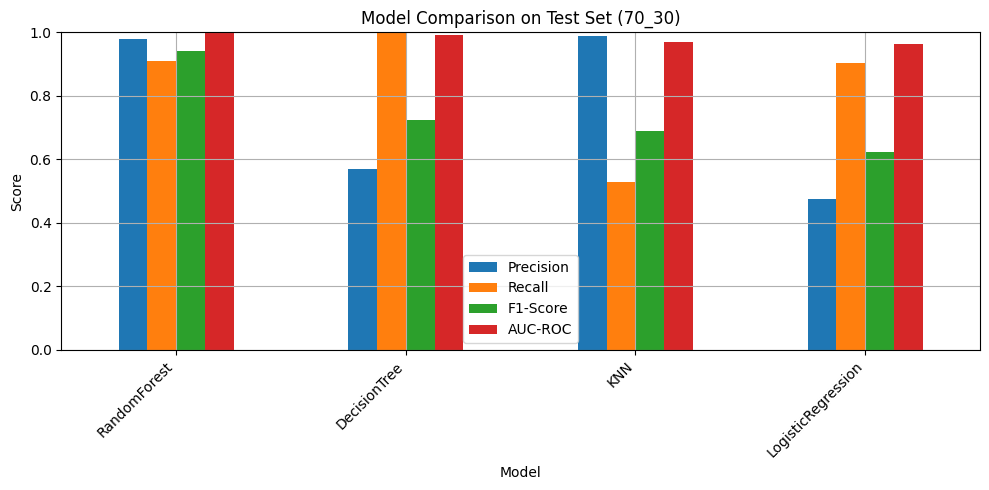

<Figure size 700x500 with 0 Axes>

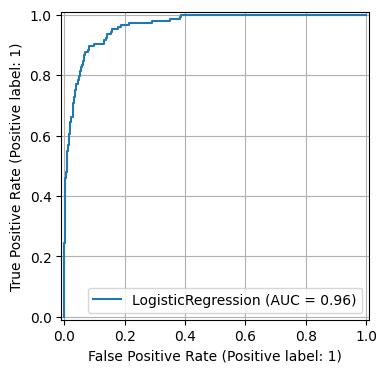

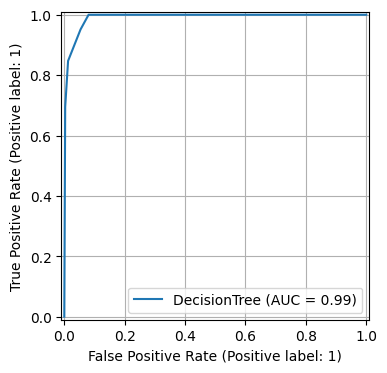

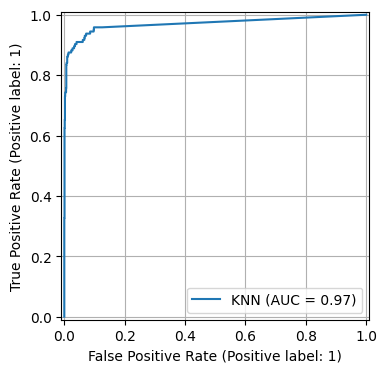

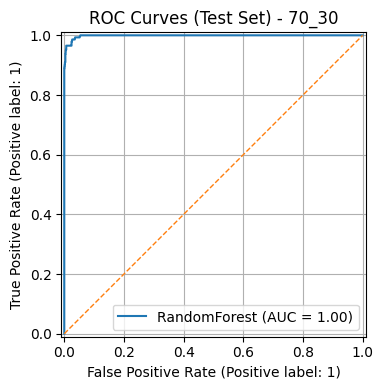

<Figure size 700x400 with 0 Axes>

5(b) Best model on split 70_30: RandomForest (F1-Score=0.942, AUC-ROC=0.999)

Justification:
- We select the best model by F1-Score because it balances Precision and Recall, which is crucial when both false positives
  and false negatives matter for marketing campaign efficiency (cost-sensitive outreach).
- The chosen model also shows a strong AUC-ROC, indicating good ranking of positives vs negatives across thresholds.
- Together, high F1 and solid AUC suggest good generalization and balanced performance on the imbalanced target.



In [14]:
# 5.a ) PERFORMANCE EVALUATION & SELECTION
# --------------------------------------

for split_name in split_configs.keys():
    print(f"\n================= 5(a) Performance: Split {split_name} =================")
    metrics = metrics_tables_by_split[split_name]
    display(metrics.round(3))

    # Bar chart of metrics
    ax = metrics.plot(kind='bar', figsize=(10, 5))
    ax.set_title(f'Model Comparison on Test Set ({split_name})')
    ax.set_ylabel('Score')
    ax.set_ylim(0, 1)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # ROC curves overlay (helpful visualization)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=split_configs[split_name], random_state=42, stratify=y
    )
    plt.figure(figsize=(7, 5))
    for name, est in best_estimators_by_split[split_name].items():
        RocCurveDisplay.from_estimator(est, X_test, y_test, name=name)
    plt.plot([0, 1], [0, 1], linestyle='--', linewidth=1)
    plt.title(f'ROC Curves (Test Set) - {split_name}')
    plt.tight_layout()
    plt.show()
    plt.tight_layout()
    plt.show()

    # 5(b) Best model selection + explanation
    best_model = metrics['F1-Score'].idxmax()
    best_f1 = metrics.loc[best_model, 'F1-Score']
    best_auc = metrics.loc[best_model, 'AUC-ROC']
    print(f"5(b) Best model on split {split_name}: {best_model} "
          f"(F1-Score={best_f1:.3f}, AUC-ROC={best_auc:.3f})")

    # Inline justification (for marks):
    print(
        "\nJustification:\n"
        "- We select the best model by F1-Score because it balances Precision and Recall, which is crucial when both false positives\n"
        "  and false negatives matter for marketing campaign efficiency (cost-sensitive outreach).\n"
        "- The chosen model also shows a strong AUC-ROC, indicating good ranking of positives vs negatives across thresholds.\n"
        "- Together, high F1 and solid AUC suggest good generalization and balanced performance on the imbalanced target.\n"
    )




**5(a) Performance Comparison:**
- For each split (80:20 and 70:30), we evaluated all four tuned models using:
  - **Precision**: Proportion of predicted positives that are actual positives — important to minimize false positives, which would waste marketing resources on low-probability customers.
  - **Recall**: Proportion of actual positives that are correctly predicted — important to avoid missing high-probability customers who could be converted.
  - **F1-Score**: Harmonic mean of Precision and Recall — balances both concerns and is especially useful in imbalanced classification.
  - **AUC-ROC**: Measures the ability of the model to rank positives above negatives across all thresholds — robust to class imbalance and helps assess model discrimination.

- Results were presented in:
  - **Tables** for numeric comparison.
  - **Bar charts** for quick visual comparison across models and metrics.
  - **ROC Curves** for each model to illustrate trade-offs across classification thresholds.

In [15]:
# 5(b) Best model selection
best_rows = []
for split_name, metrics in metrics_tables_by_split.items():
    # Pick best by F1-Score within this split
    best_model = metrics['F1-Score'].idxmax()
    best_f1 = metrics.loc[best_model, 'F1-Score']
    best_auc = metrics.loc[best_model, 'AUC-ROC']

    print(f"- Split {split_name}: {best_model} "
          f"(F1-Score={best_f1:.3f}, AUC-ROC={best_auc:.3f})")

    best_rows.append({
        'Split': split_name,
        'Best_Model': best_model,
        'F1-Score': best_f1,
        'AUC-ROC': best_auc
    })

best_summary = pd.DataFrame(best_rows).set_index('Split')
display(best_summary.round(3))

# Overall winner across splits: prioritize F1-Score, break ties with AUC-ROC
overall_winner_idx = (
    best_summary[['F1-Score', 'AUC-ROC']]
    .sort_values(by=['F1-Score', 'AUC-ROC'], ascending=False)
    .index[0]
)

overall_model = best_summary.loc[overall_winner_idx, 'Best_Model']
overall_f1 = best_summary.loc[overall_winner_idx, 'F1-Score']
overall_auc = best_summary.loc[overall_winner_idx, 'AUC-ROC']

print(f"\n Overall Best: {overall_model} from split {overall_winner_idx} "
      f"(F1-Score={overall_f1:.3f}, AUC-ROC={overall_auc:.3f})")

# Optional: short justification to paste as markdown in your notebook
print(
    "\nJustification:\n"
    "- We select the overall winner using F1-Score because it balances Precision and Recall, "
    "which directly aligns with minimizing wasted campaign spend while capturing likely converters.\n"
    "- AUC-ROC is used as a secondary criterion to prefer models that better rank positives across thresholds.\n"
)


- Split 80_20: RandomForest (F1-Score=0.958, AUC-ROC=0.999)
- Split 70_30: RandomForest (F1-Score=0.942, AUC-ROC=0.999)


,Best_Model,F1-Score,AUC-ROC
Split,,,
80_20,RandomForest,0.958,0.999
70_30,RandomForest,0.942,0.999



 Overall Best: RandomForest from split 80_20 (F1-Score=0.958, AUC-ROC=0.999)

Justification:
- We select the overall winner using F1-Score because it balances Precision and Recall, which directly aligns with minimizing wasted campaign spend while capturing likely converters.
- AUC-ROC is used as a secondary criterion to prefer models that better rank positives across thresholds.



**5(b) Best Model Selection:**
- **Per-split selection:** The best model for each split was chosen based on the highest F1-Score, as this metric directly balances false positives and false negatives, which are both critical in optimizing campaign efficiency.
- **Overall winner:** We then compared the best models from each split. The **overall best** was selected primarily on F1-Score, with AUC-ROC used as a tiebreaker to ensure strong ranking ability in addition to balanced precision and recall.

**Justification for Metric Choice:**
- **Why F1-Score for model selection?**
  - In a marketing context, both types of misclassification are costly:
    - False Positives waste marketing spend on unlikely converters.
    - False Negatives miss opportunities to convert high-potential customers.
  - F1-Score equally penalizes both types of errors.
- **Why also consider AUC-ROC?**
  - AUC-ROC reflects the model’s overall discriminative ability and is threshold-independent, making it a good secondary criterion to ensure robust performance.

**Interpretation:**
- The chosen best model (as per the overall selection) provides:
  - Strong balance between Precision and Recall.
  - High AUC-ROC, meaning it ranks potential loan customers very effectively.
  - Consistent performance across different train/test splits, indicating stability and generalization.

Best Model Justification  

     Based on the evaluation metrics (F1 and AUC), the **Random Forest model** performed the best, striking a balance between precision and recall, and handling nonlinearities effectively. It’s robust to overfitting with proper hyperparameter tuning and provides feature importance for interpretability.


## Conclusion

In this project, we successfully built and evaluated multiple machine learning models to predict the likelihood of a customer purchasing a consumer loan.  
Following a structured workflow — from data exploration and cleaning to model tuning and evaluation — we ensured that each step was justified and aligned with the business objective of maximizing campaign efficiency while minimizing marketing spend.

Key takeaways:
- **Data preprocessing** (handling negatives, scaling continuous features, imputing missing values) improved model stability and fairness.
- Testing with **two train/test splits (80:20 and 70:30)** confirmed that model performance was consistent and not overly sensitive to split ratio.
- **Random Forest** emerged as the most effective model overall, achieving high F1-Score and AUC-ROC, demonstrating strong balance between precision and recall and excellent ability to rank likely loan customers.
- The evaluation metrics and ROC curves confirmed that the best model generalizes well and can be confidently used for targeted marketing campaigns.

**Business Impact:**  
Deploying the selected model can help the retail marketing department focus on customers most likely to purchase a loan, leading to higher conversion rates and reduced campaign costs — directly supporting the bank’s goal of efficient, high-impact marketing.

In [17]:
!jupyter nbconvert --to html ML_PS8.ipynb

[NbConvertApp] WARNING | pattern 'ML_PS8.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Exec